In [94]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns

In [2]:
#reading the data
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.rename({'Unnamed: 0':'states'},axis=1,inplace=True)
df.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
df.shape

(50, 5)

In [8]:
df.isnull().sum()

states      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   states    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# outlier detection

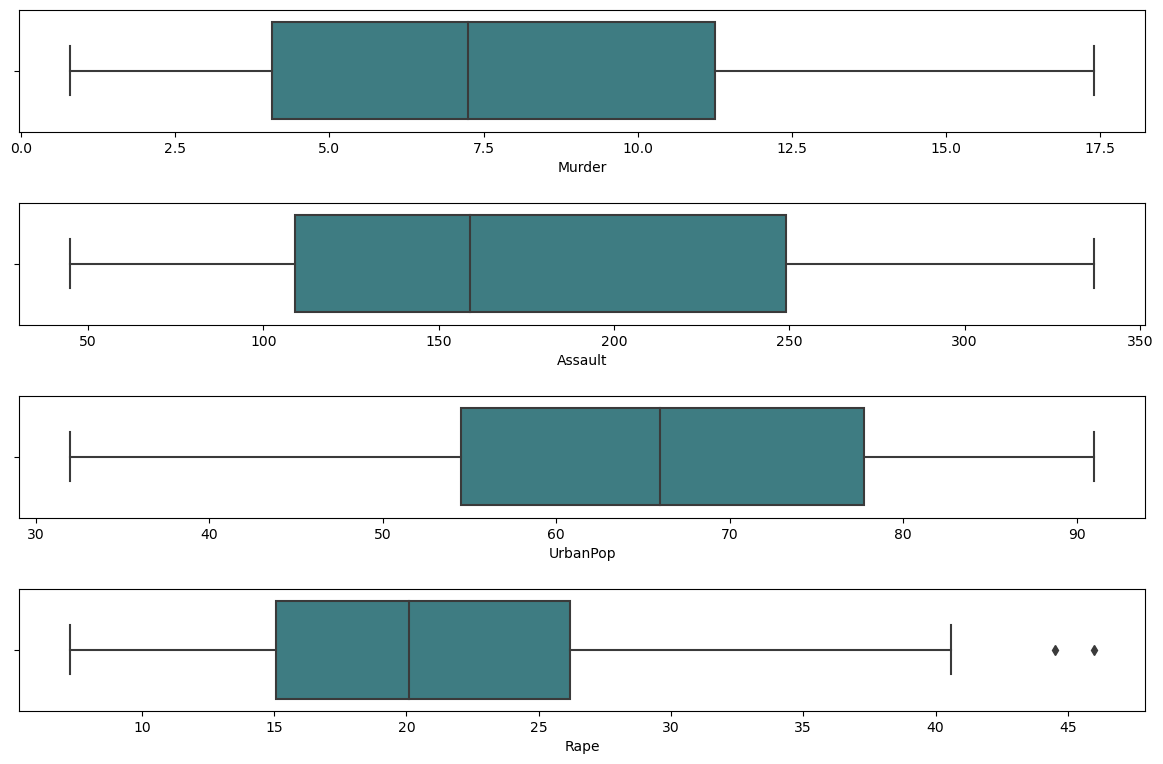

In [14]:
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)


# Correlation Heatmap

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_260\3734296831.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)


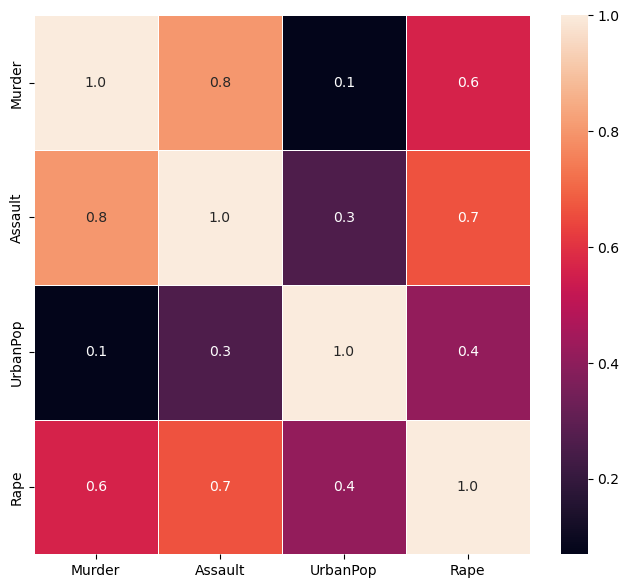

In [17]:
f,ax = plt.subplots(figsize=(8,7))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

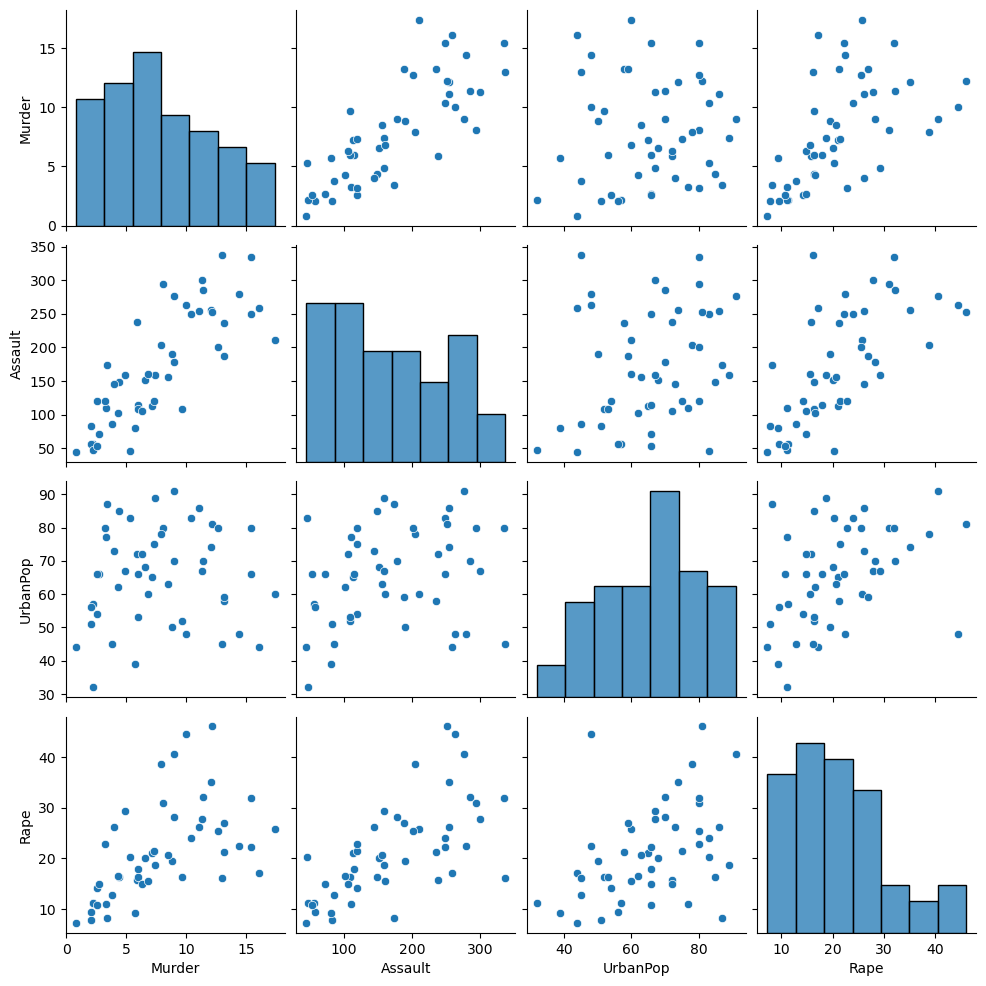

In [18]:
sns.pairplot(df)
plt.show()

# Unique points in this correlation matrix:
- Assault is positively correlated with Murder
- Assualt is positively correlated with Rape
- Rape is positively correlated with Murder


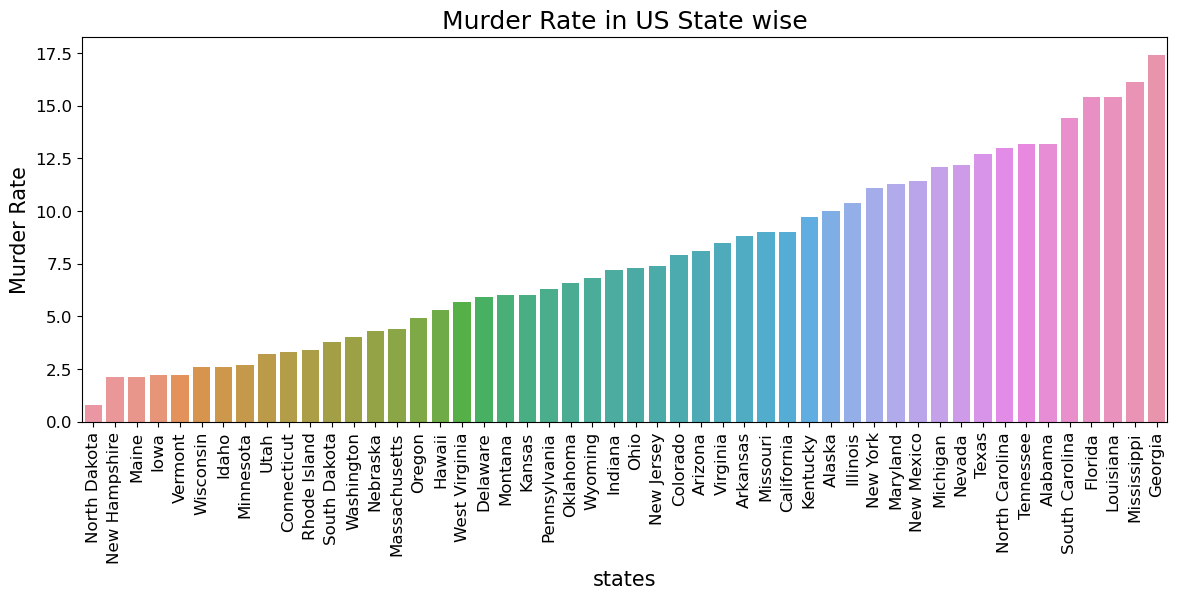

In [22]:
# make barplot and sort bars
plt.figure(figsize=(14,5))
sns.barplot(x='states', y="Murder", data=df, order=df.sort_values('Murder').states)
#set labels
plt.xlabel("states",size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

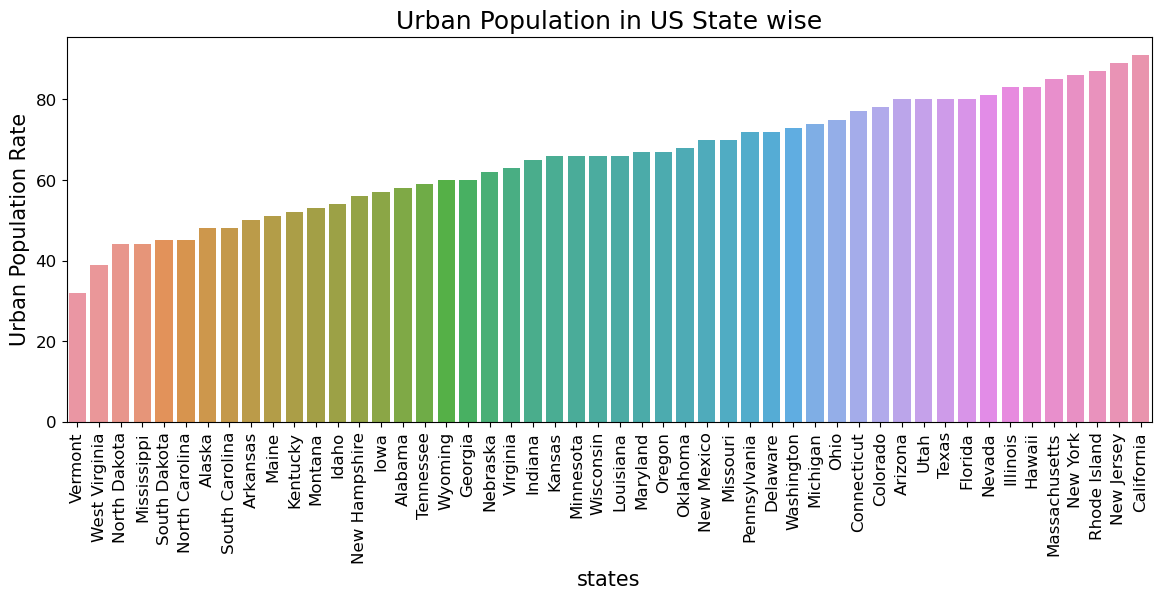

In [23]:
# make barplot and sort bars
plt.figure(figsize=(14,5))
sns.barplot(x='states', y="UrbanPop", data=df, order=df.sort_values('UrbanPop').states)
#set labels
plt.xlabel("states",size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Urban Population in US State wise", size=18)
plt.show()

# Observation:
- There is no direct relation between Murder Rate and Urban Population but you can see a less number of Murder rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect


In [26]:
high_murder=df.sort_values('Murder',ascending=False,ignore_index=True)
high_murder.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5
5,Alabama,13.2,236,58,21.2
6,Tennessee,13.2,188,59,26.9
7,North Carolina,13.0,337,45,16.1
8,Texas,12.7,201,80,25.5
9,Nevada,12.2,252,81,46.0


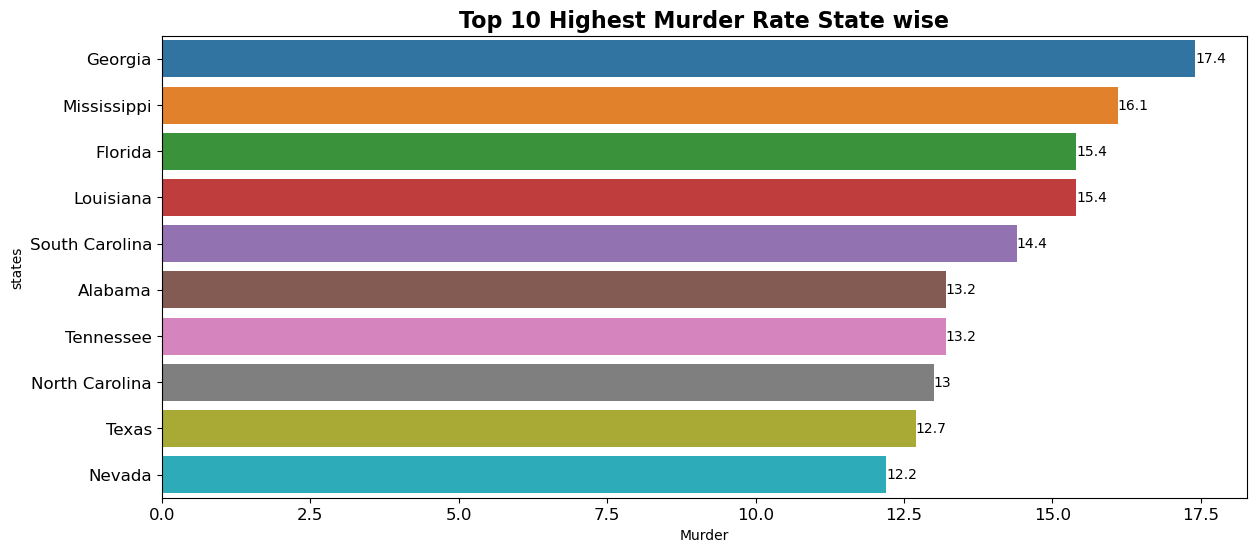

In [42]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x = high_murder.Murder[:10],y=high_murder.states[:10])
plt.yticks(rotation = 0,fontsize = 12)
plt.xticks(rotation = 0,fontsize = 12)
plt.title('Top 10 Highest Murder Rate State wise',fontsize=16,fontweight='bold')
for i in ax.containers:ax.bar_label(i)

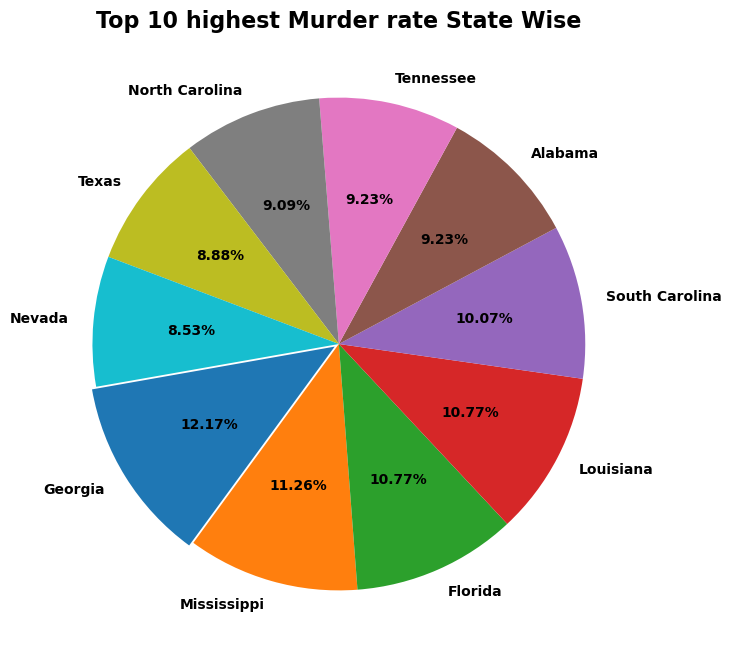

In [36]:
plt.figure(figsize=(8,8))
plt.pie(high_murder.Murder[:10],labels=high_murder.states[:10],
        explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],autopct= '%.2f%%',
       startangle=190,textprops={'size':'medium','fontweight':'bold'})
plt.title("Top 10 highest Murder rate State Wise",fontsize = 16,fontweight = 'bold')
plt.show()


In [38]:
low_murder = df.sort_values('Murder',ascending=True,ignore_index=True)
low_murder.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2
5,Wisconsin,2.6,53,66,10.8
6,Idaho,2.6,120,54,14.2
7,Minnesota,2.7,72,66,14.9
8,Utah,3.2,120,80,22.9
9,Connecticut,3.3,110,77,11.1


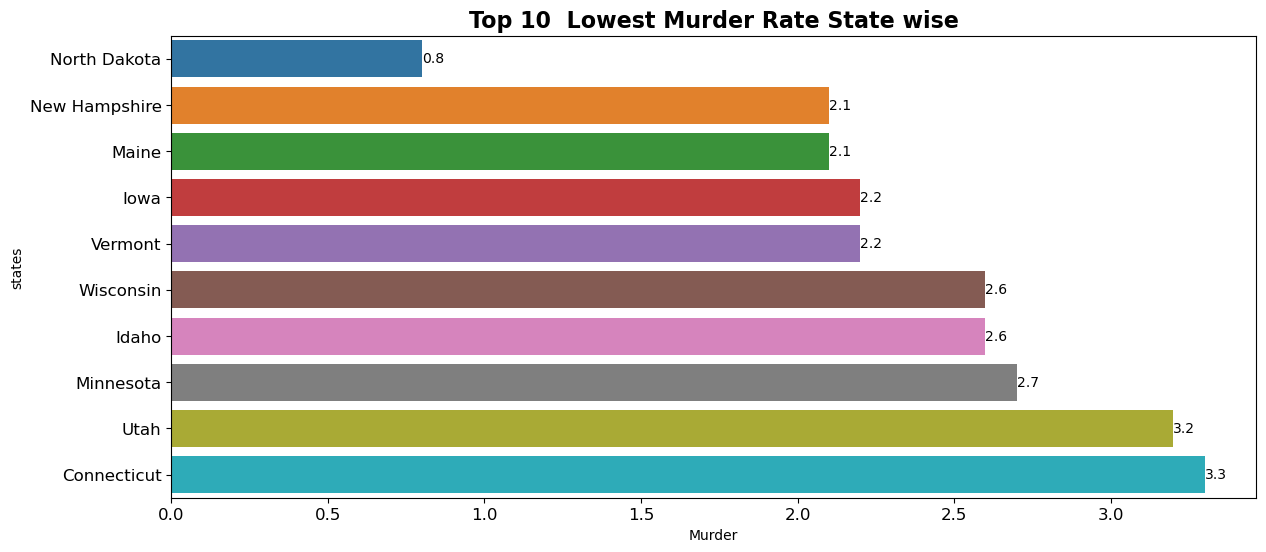

In [41]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x = low_murder.Murder[:10],y=low_murder.states[:10])
plt.yticks(rotation = 0,fontsize = 12)
plt.xticks(rotation = 0,fontsize = 12)
plt.title('Top 10  Lowest Murder Rate State wise',fontsize=16,fontweight='bold')
for i in ax.containers:ax.bar_label(i)

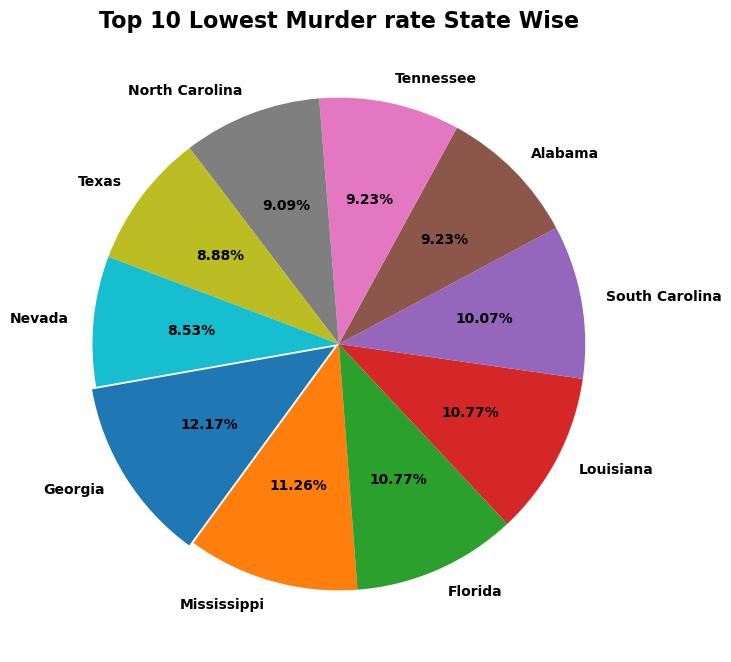

In [40]:
plt.figure(figsize=(8,8))
plt.pie(high_murder.Murder[:10],labels=high_murder.states[:10],
        explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],autopct= '%.2f%%',
       startangle=190,textprops={'size':'medium','fontweight':'bold'})
plt.title("Top 10 Lowest Murder rate State Wise",fontsize = 16,fontweight = 'bold')
plt.show()

# Observations:
- Highest Murder Rate : Georgia, Missisippi and Florida
- Lowest Murder Rate : North Dakota, New Hampshire, Idaho, Iowa, Maine, Vermont and Wisconsin.


# Assult Rate:

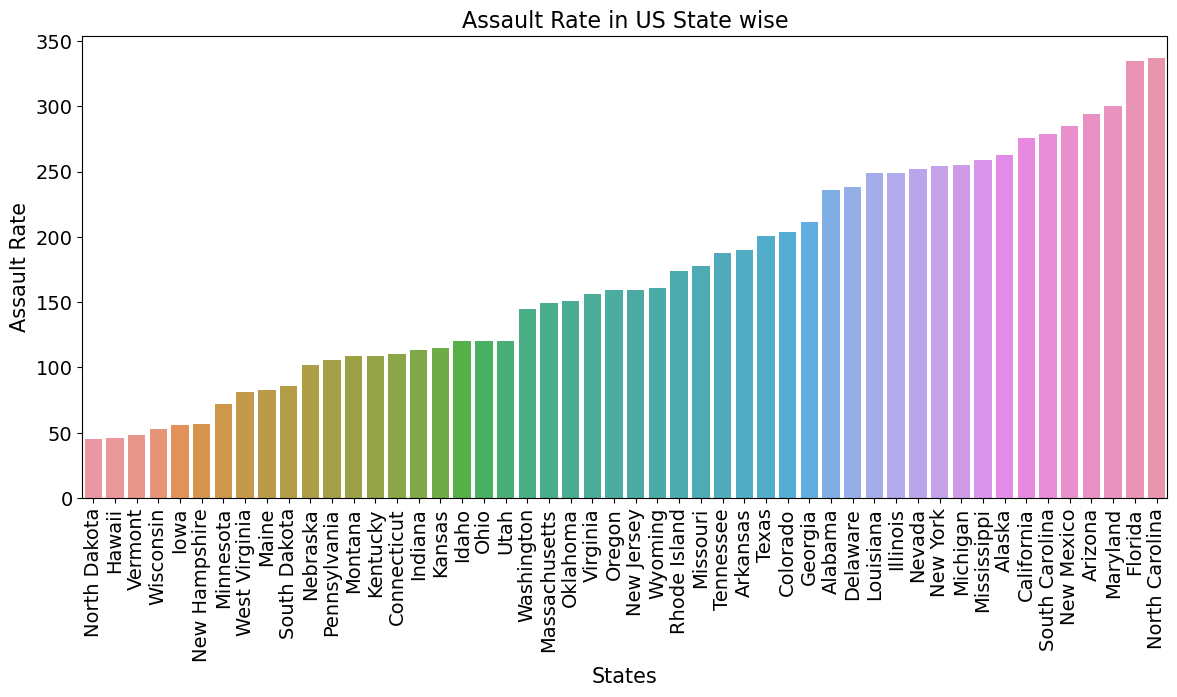

In [45]:
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='states', y="Assault", data=df, order=df.sort_values('Assault').states)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Assault Rate in US State wise", size=16)
plt.show()


In [51]:
high_assault=df.sort_values('Assault',ascending=False,ignore_index=True)
high_assault.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


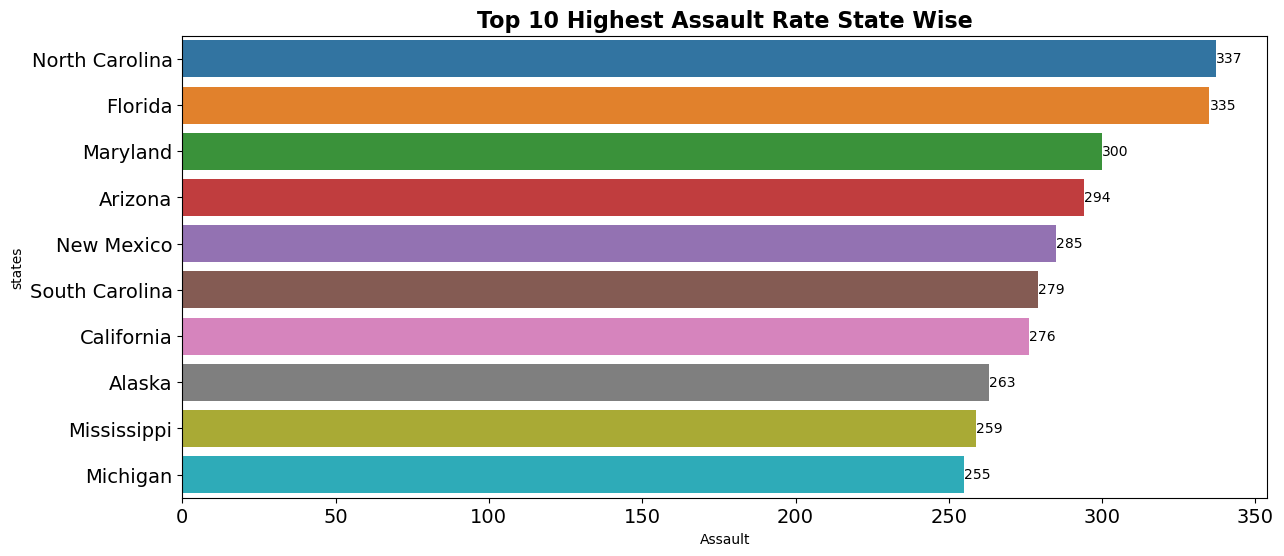

In [52]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_assault.Assault[:10], y = high_assault.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)


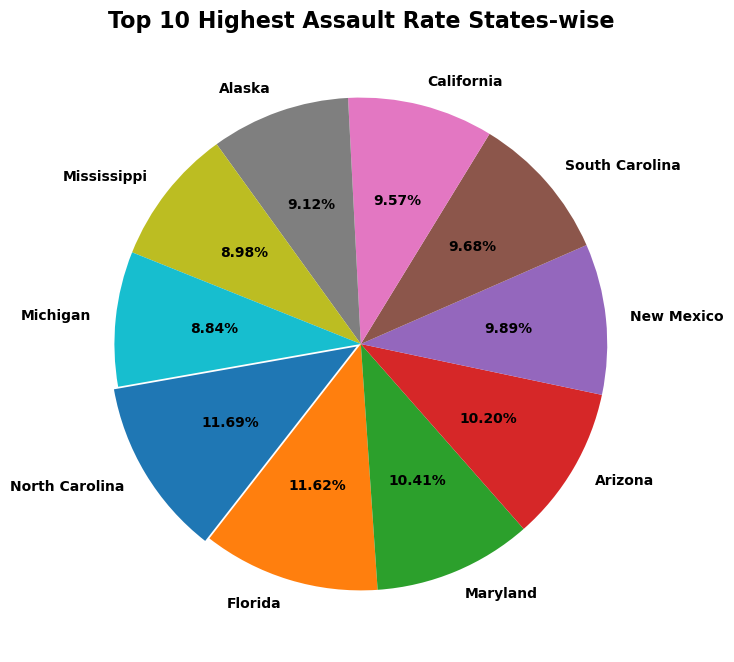

In [53]:
plt.figure(figsize = (8,8))
plt.pie(high_assault.Assault[:10], labels=high_assault.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()


In [56]:
low_assault=df.sort_values('Assault',ascending=True,ignore_index=True)
low_assault.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3
5,New Hampshire,2.1,57,56,9.5
6,Minnesota,2.7,72,66,14.9
7,West Virginia,5.7,81,39,9.3
8,Maine,2.1,83,51,7.8
9,South Dakota,3.8,86,45,12.8


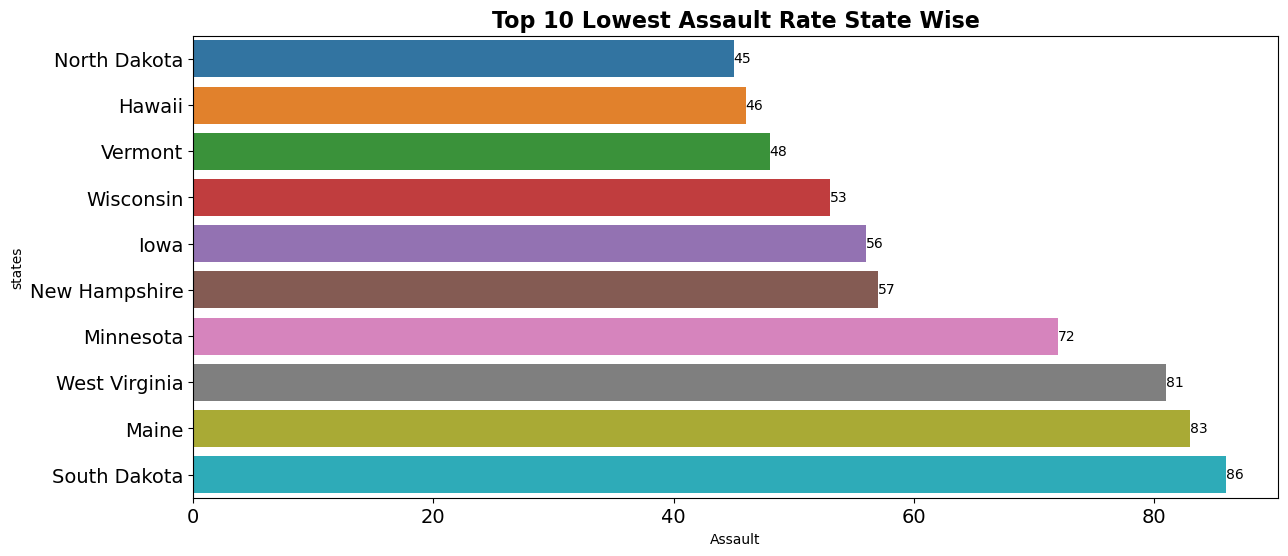

In [59]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=low_assault.Assault[:10],y=low_assault.states[:10])
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation=0,fontsize=14)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)


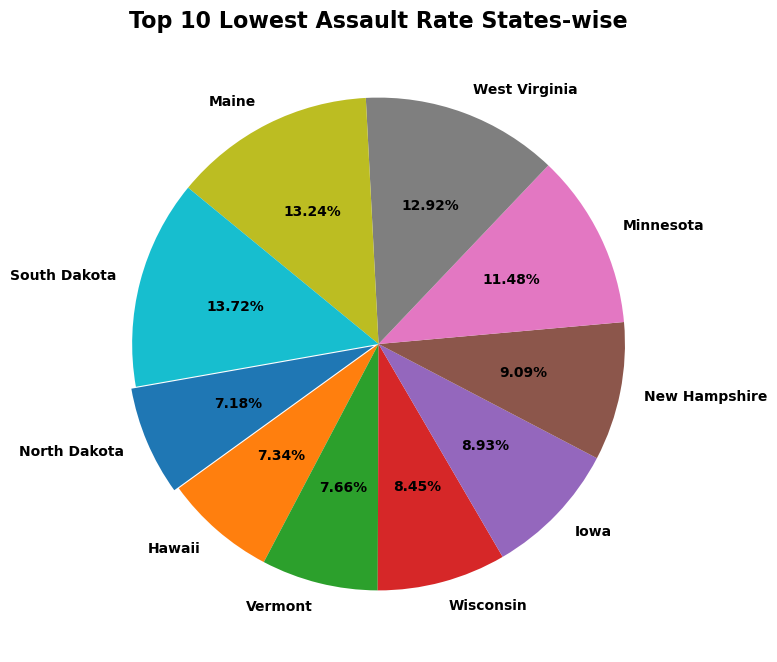

In [60]:
plt.figure(figsize = (8,8))
plt.pie(low_assault.Assault[:10], labels=low_assault.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

# Observations:
- Highest Assault Rate : North Carolina, Florida and Maryland
- Lowest Assault Rate : North Dakota, Hawaii and Vermont.


# Rape Rate:

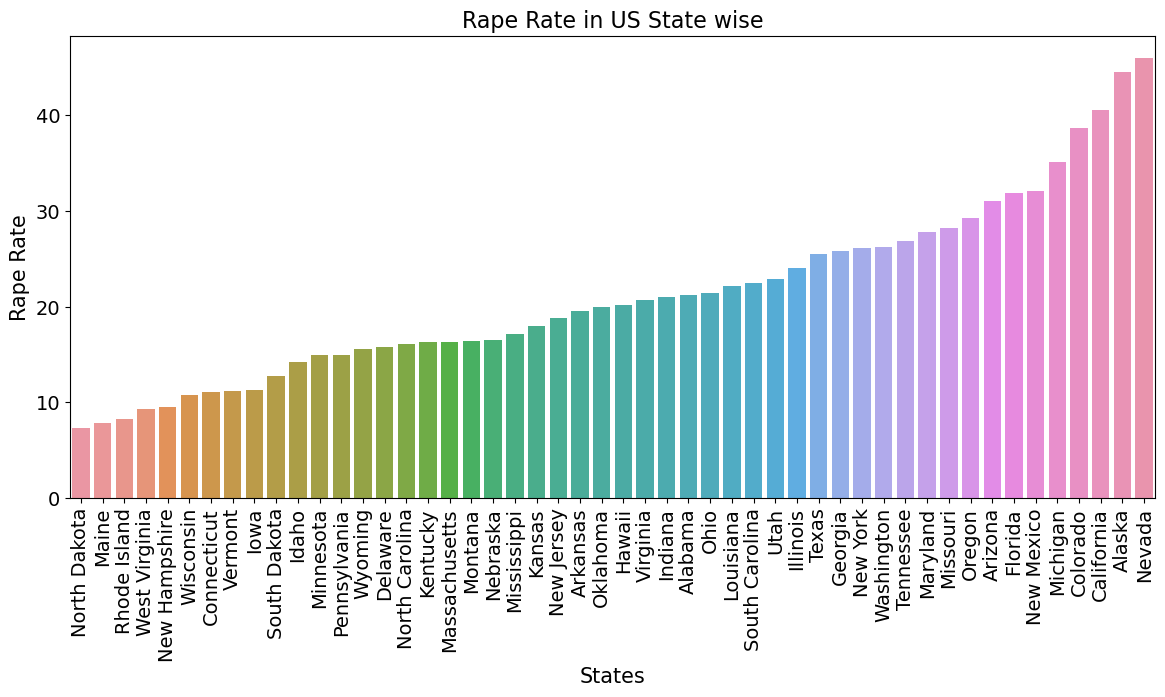

In [61]:
plt.figure(figsize=(14,6))
#make bar plot and sort bars
sns.barplot(x='states',y='Rape',data=df,order=df.sort_values('Rape').states)
#set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Rape Rate in US State wise", size=16)
plt.show()

In [63]:
high_rape=df.sort_values('Rape',ascending=False,ignore_index=True)
high_rape.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


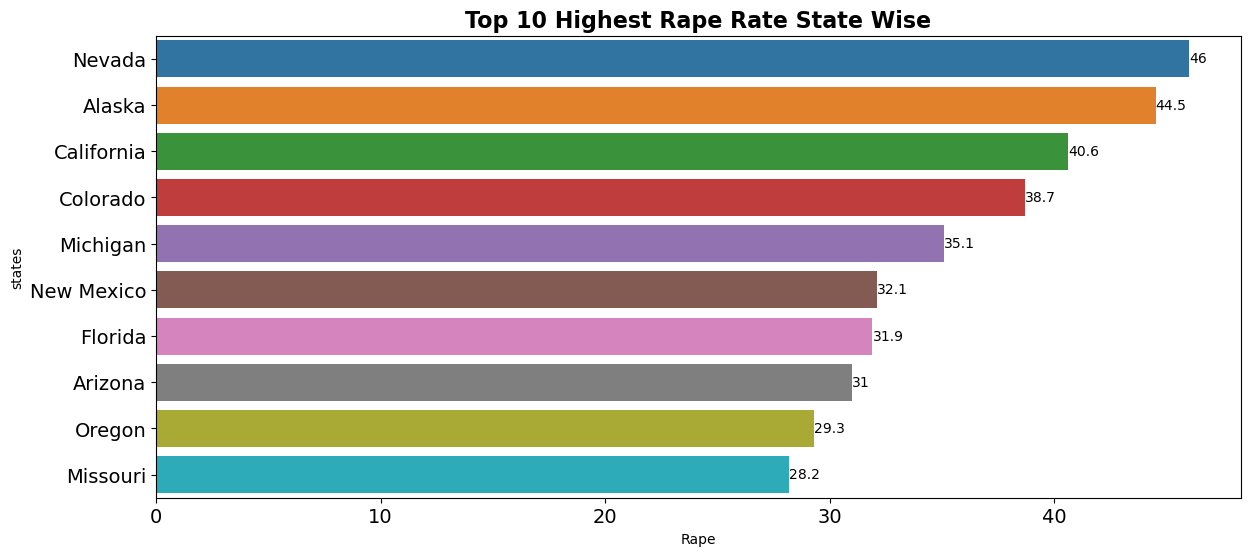

In [65]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_rape.Rape[:10], y =high_rape.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)


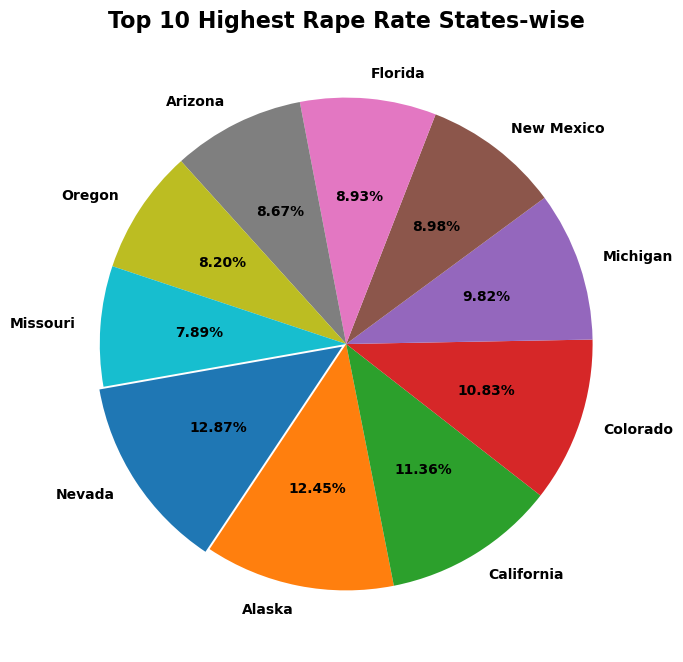

In [66]:
plt.figure(figsize = (8,8))
plt.pie(high_rape.Rape[:10], labels= high_rape.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium',
                   'fontweight':'bold'})

plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()


In [67]:
low_rape=df.sort_values('Rape',ascending=True,ignore_index=True)
low_rape

,states,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


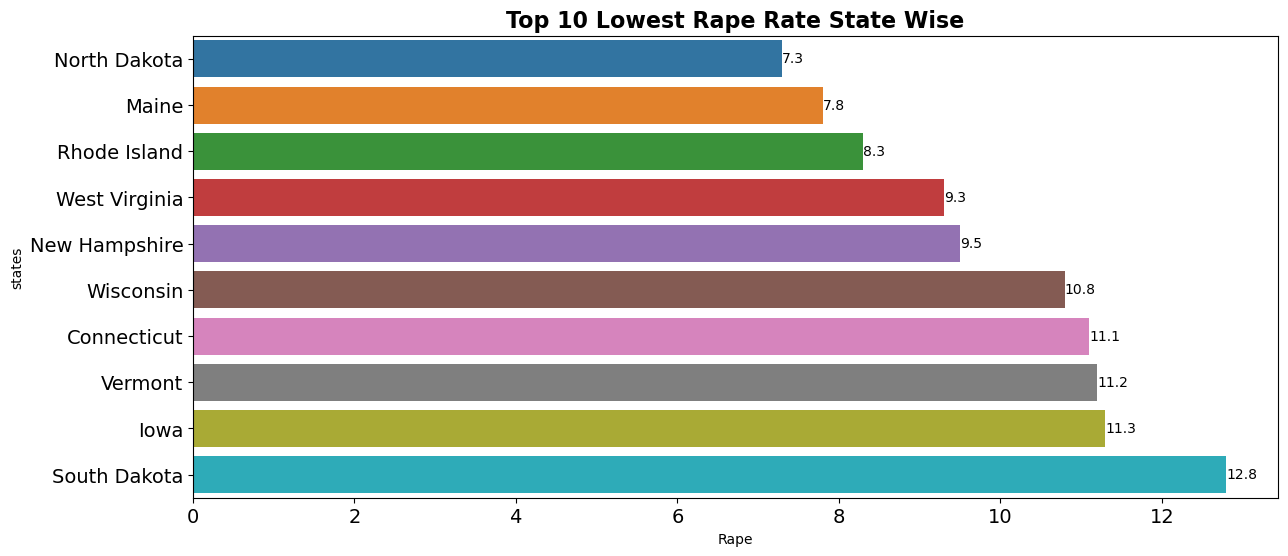

In [68]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_rape.Rape[:10], y = low_rape.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)


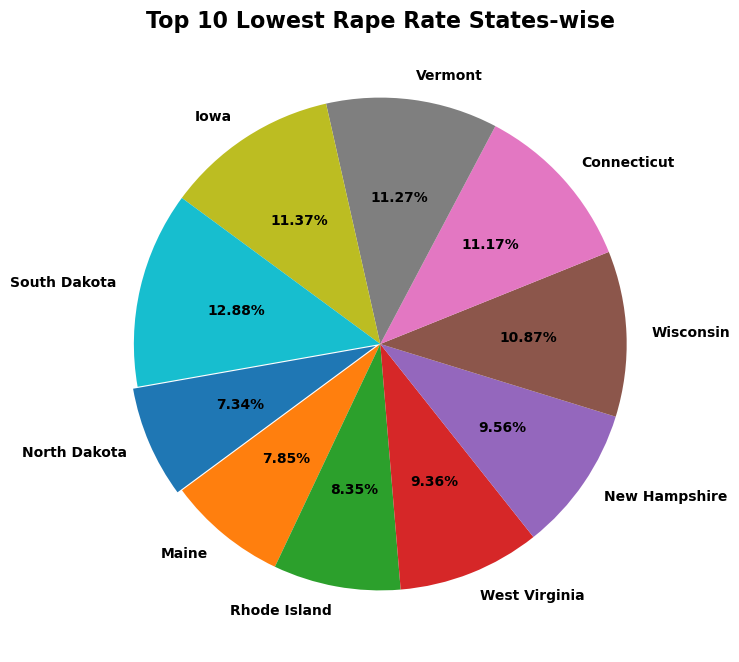

In [69]:
plt.figure(figsize = (8,8))
plt.pie(low_rape.Rape[:10], labels= low_rape.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()


# Urban Population Rate


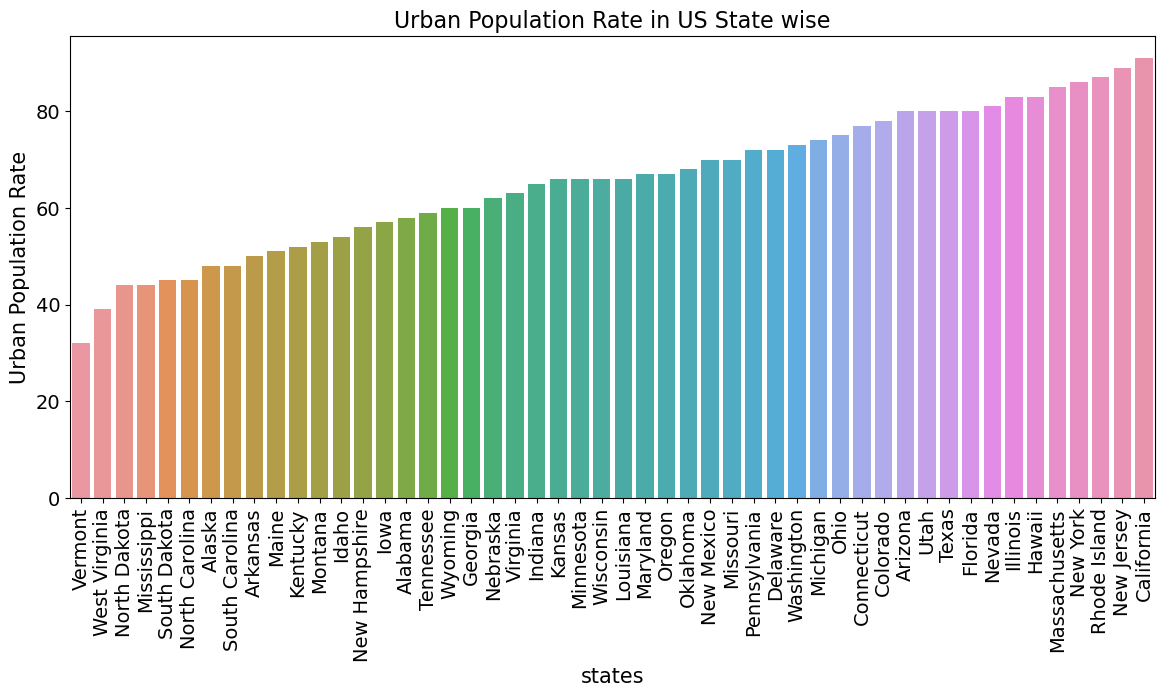

In [71]:
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='states', y="UrbanPop", data=df, order=df.sort_values('UrbanPop').states)

# set labels
plt.xlabel("states", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US State wise", size=16)
plt.show()


In [75]:
high_population=df.sort_values('UrbanPop',ascending=False,ignore_index=True)
high_population.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3
5,Hawaii,5.3,46,83,20.2
6,Illinois,10.4,249,83,24.0
7,Nevada,12.2,252,81,46.0
8,Texas,12.7,201,80,25.5
9,Arizona,8.1,294,80,31.0


In [76]:
low_population=df.sort_values('UrbanPop',ascending=True,ignore_index=True)
high_population.head(10)

,states,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3
5,Hawaii,5.3,46,83,20.2
6,Illinois,10.4,249,83,24.0
7,Nevada,12.2,252,81,46.0
8,Texas,12.7,201,80,25.5
9,Arizona,8.1,294,80,31.0


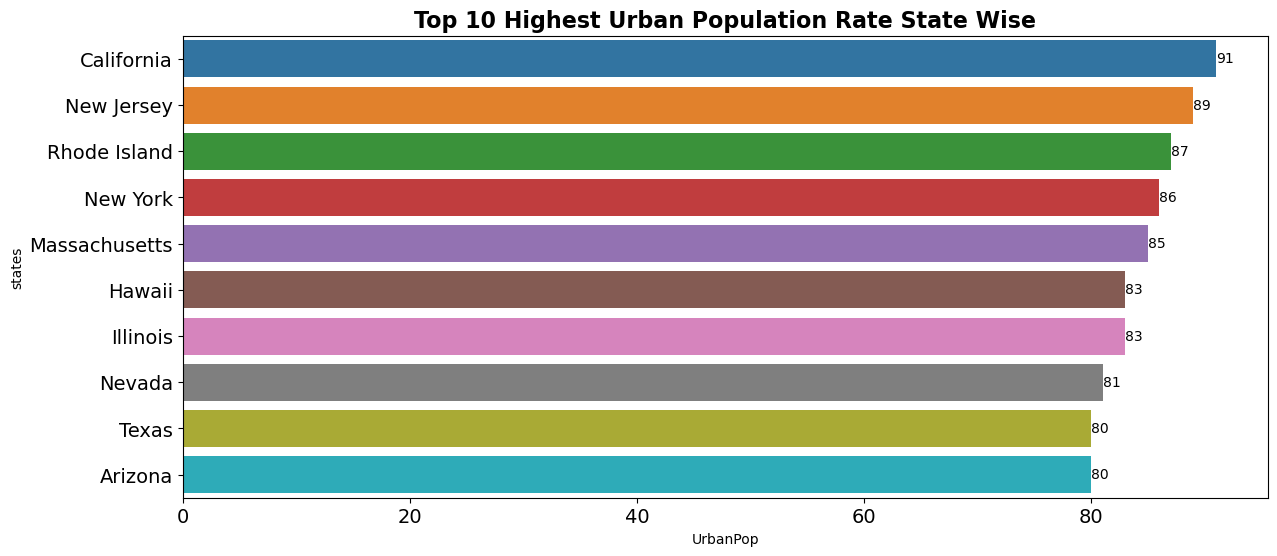

In [77]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_population.UrbanPop[:10], y = high_population.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)


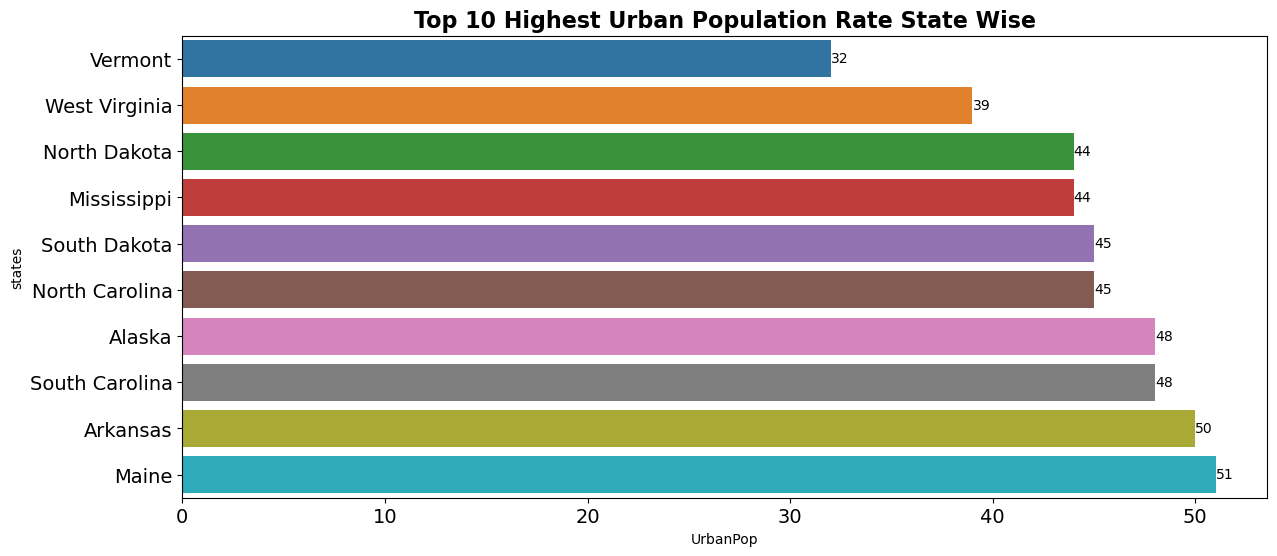

In [78]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_population.UrbanPop[:10], y = low_population.states[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)


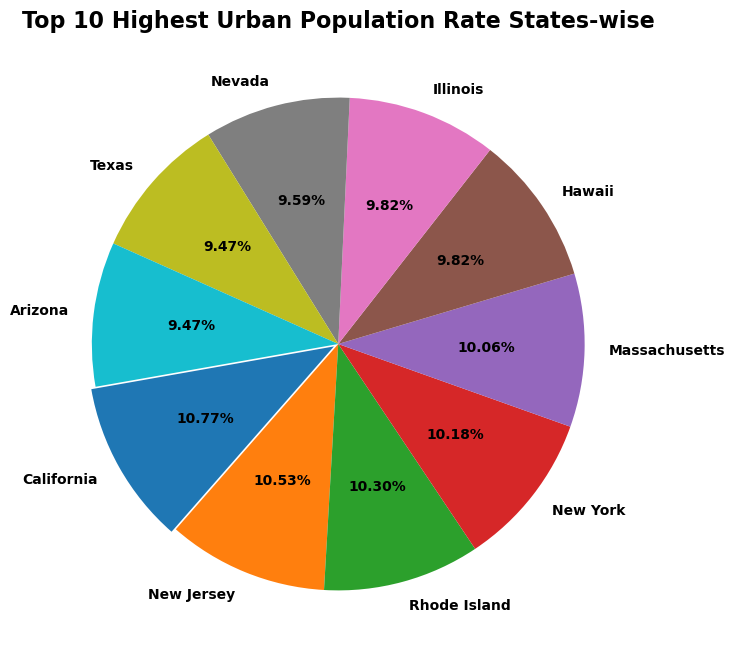

In [79]:
plt.figure(figsize = (8,8))
plt.pie(high_population.UrbanPop[:10], labels= high_population.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()


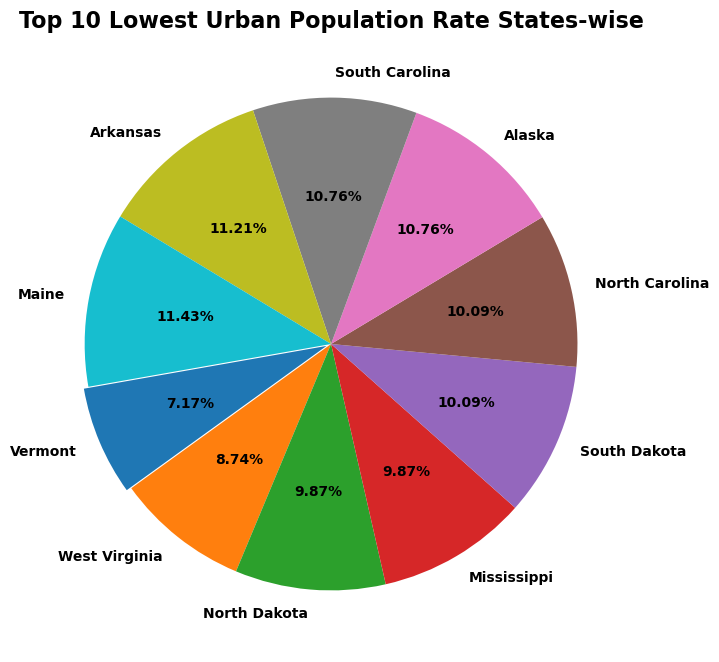

In [81]:
plt.figure(figsize = (8,8))
plt.pie(low_population.UrbanPop[:10], labels= low_population.states[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()


# Observations:
- Highest Urban Population Rate : California, New Jersey and Rhode Island
- Lowest Urban Population Rate : Vermount, West Virginia and North Dakota.


# Data Preprocessing

In [84]:
crime_df=df.set_index('states')
crime_df.head()

,Murder,Assault,UrbanPop,Rape
states,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# Standardising the Data

In [87]:
standard_scaler=StandardScaler()
std_crime=standard_scaler.fit_transform(crime_df)
std_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Normalizing the data

In [97]:
minmax = MinMaxScaler()
norm_crime = minmax.fit_transform(crime_df)
norm_crime

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

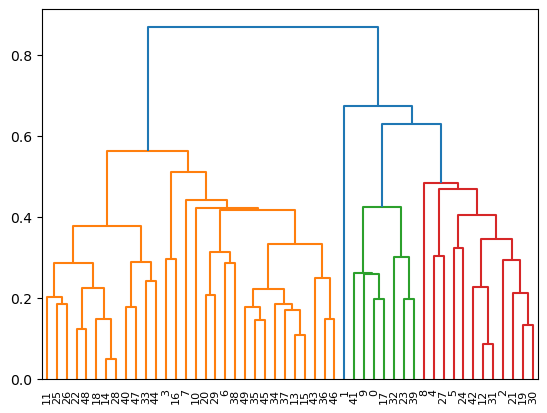

In [118]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(norm_crime,method='average'))

In [120]:
#creating clusters
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [121]:
y_hc=hc.fit_predict(norm_crime)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [124]:
df['h_clusterid']=hc.labels_
df.head(10)

,states,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [154]:
df.iloc[:,1:5].groupby(df['h_clusterid']).mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


# KMeans Clustering



# Within-Cluster Sum-of-Squares Criterion
- Use Elbow Graph to find optimum number of clusters (K value) from K values range
- The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS



In [128]:
df1=pd.read_csv('crime_data.csv')
df1.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [132]:
df1.rename({'Unnamed: 0':'States'},axis=1,inplace=True)
df1.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


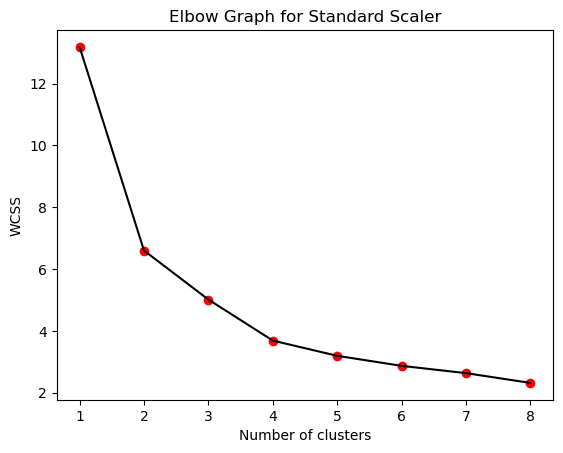

In [126]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_crime)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [125]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(norm_crime)
model.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [134]:
x=pd.Series(model.labels_)
df1['clust']=x
df1.head(10)

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [135]:
df1.iloc[:,1:5].groupby(df1.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.966667,264.000000,76.500000,33.608333
2,5.852941,141.176471,73.647059,19.335294
3,13.937500,243.625000,53.750000,21.412500


# DBSCAN

In [136]:
from sklearn.cluster import DBSCAN

In [138]:
df2=pd.read_csv('crime_data.csv')
df2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [139]:
df2.rename({'Unnamed: 0':'States'},axis=1,inplace=True)
df2

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [140]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(std_crime)

DBSCAN(eps=2)

In [141]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [142]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [147]:
df3=pd.concat([df2,c1],axis=1)
df3

,States,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [148]:
#2nd record is Noicy
df3.groupby('cluster').agg(['mean'])


,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster,,,,
-1,10.000000,263.000000,48.000000,44.500000
0,7.742857,168.877551,65.897959,20.757143


# Conclusion:
- I have applied EDA to analyze dataset. Discovered correlation between diff variables and found colinearity.
- Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
- I have used & analyzed Three clustering techniques here. i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.
- By applying clustering on different transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.
- KMeans clustering is sensitive to outliers.
